In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../hashmatching/resnet50_vec512_hash64.csv', index_col=None)

In [3]:
df.describe

<bound method NDFrame.describe of                   actual         predicted     score
0       127_000000000000  128_000000610332  0.015984
1        97_000000000003   97_000000605665  0.066690
2        97_000000000003  165_000000196573  0.075595
3       756_000000000005  756_000000059617  0.000896
4       756_000000000005  756_000000047808  0.001017
...                  ...               ...       ...
110411  345_000000043199  275_000000143855  0.009426
110412  345_000000043199  275_000000393006  0.009583
110413  345_000000043199   81_000000207789  0.009692
110414  345_000000043199  275_000000449308  0.009696
110415  345_000000043199   81_000000619424  0.010201

[110416 rows x 3 columns]>

In [4]:
df[['actual_class', 'actual_idx']] = df.actual.str.split('_', expand=True)
df[['predicted_class', 'predicted_idx']] = df.predicted.str.split('_', expand=True)

df[['actual_class', 'actual_idx', 'predicted_class', 'predicted_idx']] = df[['actual_class', 'actual_idx', 'predicted_class', 'predicted_idx']].apply(pd.to_numeric)

In [5]:
df['match'] = df.actual_class == df.predicted_class

In [6]:
df_pivot = df.pivot_table(aggfunc=['mean', 'size', 'sum'], index='actual_class').reset_index()

<AxesSubplot:xlabel='match'>

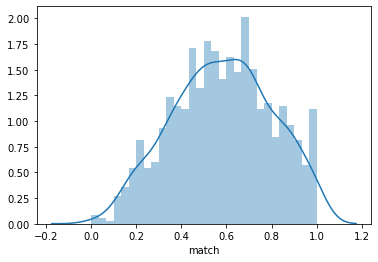

In [7]:
sns.distplot(df_pivot['mean']['match'], bins=30)

In [8]:
sum(df_pivot['mean']['match'] < 0.5)

358

In [16]:
df_mode = df.groupby(['actual_class'])['predicted_class'].apply(lambda x: x.value_counts(dropna=False).idxmax()).reset_index()

In [ ]:
df.groupby(['actual_class'])['predicted_class'].median().reset_index()

In [17]:
df_mode

,actual_class,predicted_class
0,0,0
1,1,1
2,2,3
3,3,3
4,4,4
...,...,...
992,992,992
993,993,993
994,994,994
995,995,995


In [18]:
df_mode['match'] = df_mode.actual_class == df_mode.predicted_class

In [19]:
df_mode.match.value_counts()

True     946
False     51
Name: match, dtype: int64